## Оптимизированы следующие параметры:
- Изменили архитектуру нейронной сети, добавив два сверточных слоя и два полносвязных слоя.
- Использовали оптимизатор Adam для обучения модели, что может обеспечить более быстрый и стабильный процесс обучения.
- Нормализовали данные при помощи преобразования transforms.Normalize, чтобы ускорить обучение и повысить стабильность обучения модели.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

In [15]:
# Transformation for data normalization
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [16]:
# Load CIFAR-10 dataset
train_dataset = datasets.CIFAR10(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='data/', train=False, transform=transform, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=4, shuffle=False)

In [18]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)


    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [20]:
model = Net()

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader, 0):
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()


            running_loss += loss.item()
            if i % 200 == 199:
                print(f"Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}")
                running_loss = 0.0

In [24]:
def test_model(model, test_loader, num_images=8):
    model.eval()
    count = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)


            for i in range(inputs.size(0)):
                if count >= num_images:
                    return
                count += 1


                image = inputs[i] / 2 + 0.5  # Unnormalize the image
                plt.imshow(image.permute(1, 2, 0))
                plt.title(f"Predicted: {classes[predicted[i]]}, Ground Truth: {classes[labels[i]]}")
                plt.show()

In [25]:
train_model(model, train_loader, criterion, optimizer, num_epochs=10)

Epoch 1, Batch 200, Loss: 1.707
Epoch 1, Batch 400, Loss: 1.336
Epoch 1, Batch 600, Loss: 1.214
Epoch 2, Batch 200, Loss: 1.009
Epoch 2, Batch 400, Loss: 0.982
Epoch 2, Batch 600, Loss: 0.961
Epoch 3, Batch 200, Loss: 0.803
Epoch 3, Batch 400, Loss: 0.792
Epoch 3, Batch 600, Loss: 0.798
Epoch 4, Batch 200, Loss: 0.653
Epoch 4, Batch 400, Loss: 0.648
Epoch 4, Batch 600, Loss: 0.671
Epoch 5, Batch 200, Loss: 0.494
Epoch 5, Batch 400, Loss: 0.512
Epoch 5, Batch 600, Loss: 0.529
Epoch 6, Batch 200, Loss: 0.387
Epoch 6, Batch 400, Loss: 0.384
Epoch 6, Batch 600, Loss: 0.414
Epoch 7, Batch 200, Loss: 0.268
Epoch 7, Batch 400, Loss: 0.284
Epoch 7, Batch 600, Loss: 0.325
Epoch 8, Batch 200, Loss: 0.184
Epoch 8, Batch 400, Loss: 0.213
Epoch 8, Batch 600, Loss: 0.227
Epoch 9, Batch 200, Loss: 0.139
Epoch 9, Batch 400, Loss: 0.154
Epoch 9, Batch 600, Loss: 0.166
Epoch 10, Batch 200, Loss: 0.109
Epoch 10, Batch 400, Loss: 0.126
Epoch 10, Batch 600, Loss: 0.140


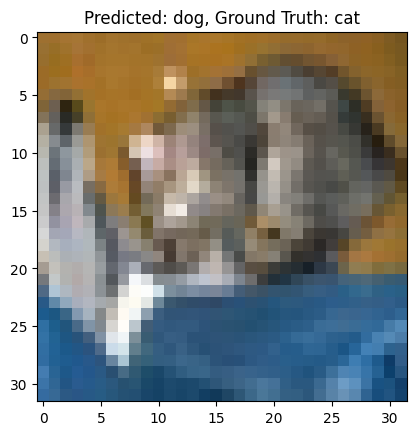

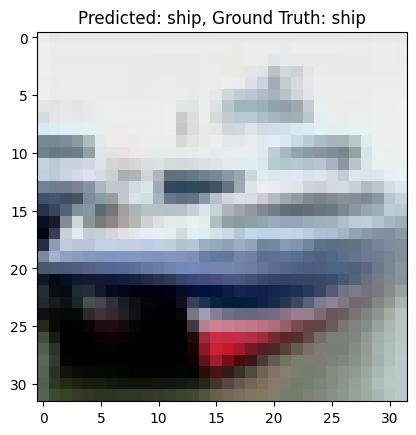

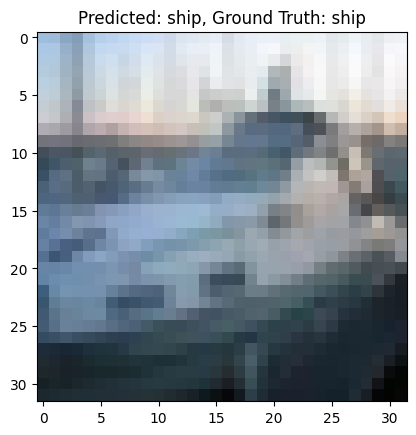

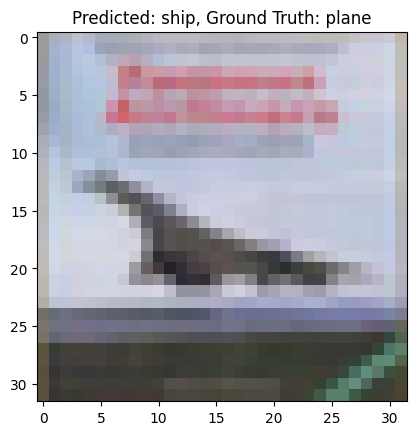

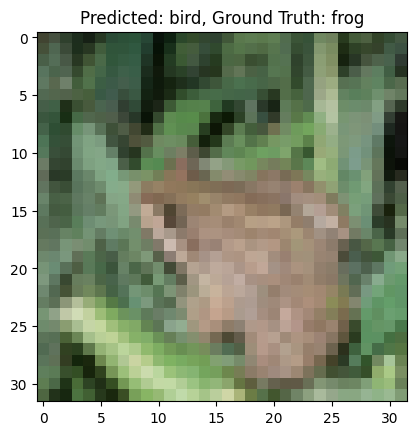

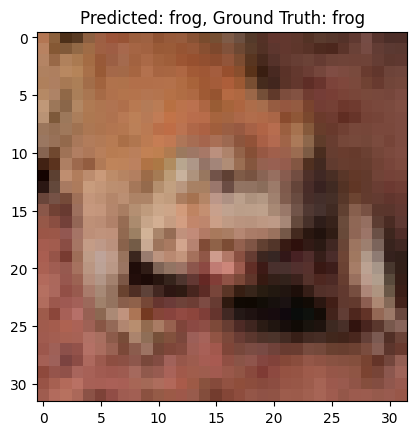

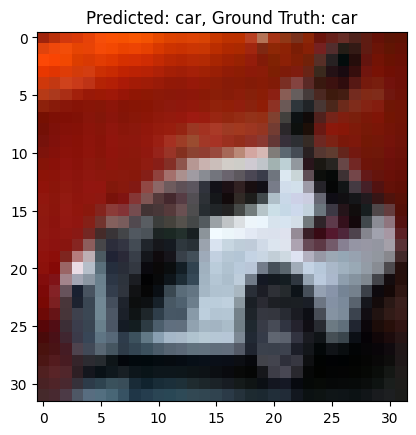

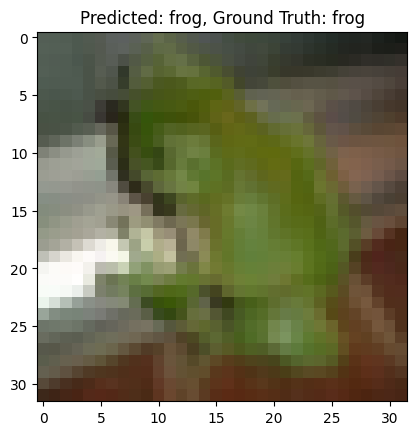

In [26]:
test_model(model, test_loader, num_images=8)